# Data Science in Python - A quick tutorial

This notebook was created to provide an introduction to data science and 
machine learning with Python for the 2020 TDT4173 course at NTNU.
As with most guides, it is hardly exhaustive, but should 
hopefully serve as a starting point and/or reference material for 
those new to the craft. In it, we will cover the following high-level topics:

- Numpy fundamentals
- Pandas + simple plotting
- Skicit Learn + practical example  


### Alternatives

As there already exists numerous resources on data science in python on the 
internet, writing this tutorial is somewhat redundant. 
For any problem or new framework you run into, odds are that there will be 
a relevant medium, towardsdatascience, or gist blog post just one well-crafted 
google search away. Kaggle is another good source of knowledge; while primarily
a platform for cutting-edge data science competitions, often with cash prizes,
they also tend to award points for helpfullness, which over time has resulted
in an ever-growing [repository of notebooks](https://www.kaggle.com/notebooks)
with helpful explanation of topics. If this tutorial is not 
to your liking, perhaps one of the following alternatives might be:

- [This Kaggle Kernel](https://www.kaggle.com/kanncaa1/data-sciencetutorial-for-beginners) is a great place to start for basic python and data science. In fact, [the author's kaggle page](https://www.kaggle.com/kanncaa1/notebooks) is a highly awarded goldmine of tutorials on various topics in data science and machine learning.
- Scikit Learn also have their own set of [tutorials](https://scikit-learn.org/stable/tutorial/index.html) and [guides](https://scikit-learn.org/stable/user_guide.html) on how to use the library.
- For those who prefer video tutorials, a youtuber called [Derek Banas](https://www.youtube.com/c/derekbanas/featured) recently put out a set of quick, but reasonably comprehensive tuorials on [numpy](https://www.youtube.com/watch?v=8Y0qQEh7dJg), [pandas](https://www.youtube.com/watch?v=PcvsOaixUh8), [matplotlib](https://www.youtube.com/watch?v=wB9C0Mz9gSo), and [seaborn](https://www.youtube.com/watch?v=6GUZXDef2U0)


In [1]:
# Install dependencies  (use "conda install ..." if your not using pip)
# Note: starting lines with "!" in jupyter allows execution of standard
# shell functions. The following line has been tested on MAC/Linux,
# but consider manual installation if it doesn't work on windows
!pip install numpy pandas sklearn matplotlib optuna seaborn

You should consider upgrading via the '/Users/sverre/Projects/teaching/tdt4173/venv/bin/python -m pip install --upgrade pip' command.


## NumPy

<img src="https://numpy.org/images/logos/numpy.svg" alt="Drawing" style="width: 200px;"/>

[NumPy](https://numpy.org/about/) is the defacto library for scientific computing in Python.
Its core datastructures and functionality forms the backbone
of many popular libraries such as [Pandas](https://pandas.pydata.org), 
[Scipy](https://www.scipy.org), 
[Statsmodels](https://www.statsmodels.org/stable/index.html), 
[Scikit Learn](https://scikit-learn.org/stable/),
[Scikit Image](https://scikit-image.org), and [NLTK](https://www.nltk.org).
In addition, its notation and naming conventions are largely reused in frameworks 
such as [Tensorflow](https://www.tensorflow.org) and [Pytorch](https://pytorch.org). 
Consequently, it is useful to get familiar with its concepts and build a deep intuition 
for how it works. For those interested in it from an academic perspective,
NumPy recently got a [citable paper in nature](https://www.nature.com/articles/s41586-020-2649-2)
(after being actively used in the field for 15 years).
This tutorial is more practically oriented and will 
cover the following topics:

- Creating arrays
- Vectorized operations
- Indexing

In [2]:
# This is the conventional way to import numpy 
import numpy as np

# Set precision when printing out floating point numbers
# to make this notebook a bit easier to read 
np.set_printoptions(precision=3, suppress=True)

### Arrays

The numpy library revolves around multidimensional 
arrays, also known as tensors.
There are numerous ways to construct these, but a few
common ones will be demonstrated below.

Simplest case: from a normal python list.

In [3]:
np.array([1, 2, 3, 9, 8, 7])

array([1, 2, 3, 9, 8, 7])

We can also use the `dtype` argument to explicitly tell numpy
which format the data should be in. In this case, we will
use 32-bit floating point numbers, which is a format capable
of representing decimal numbers (even though we just pass integers here).

In [4]:
np.array([1, 2, 3, 9, 8, 7], dtype=np.float32)

array([1., 2., 3., 9., 8., 7.], dtype=float32)

We can also make higher-dimensional arrays (higher rank tensors)
by passing a nested list.

In [5]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
print('Shape of matrix:', matrix.shape)
matrix

Shape of matrix: (2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

Analogous to the `range()` function in python, numpy arrays
can be constructed over a range.

In [6]:
print('Simple:', np.arange(5))
print('With explicit start, stop, and offset:', np.arange(0, 10, 2))

Simple: [0 1 2 3 4]
With explicit start, stop, and offset: [0 2 4 6 8]


There are also built-in constructors for creating a bunch
of zeros or ones

In [7]:
print('10 zeros:', np.zeros(10))
print('12 ones as a 3x4 matrix: \n', np.ones((3, 4)))

10 zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12 ones as a 3x4 matrix: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


Or even sample from random distributions

In [8]:
print(f'Sampled uniformly in [3,6]: {np.random.uniform(3, 6, size=5)}')
print(f'Randomly permuted: {np.random.permutation(5)}')
print(f'Randomly sampled from N(3,2) {np.random.normal(3, 2, size=5)}')

Sampled uniformly in [3,6]: [3.643 4.462 4.275 5.658 3.526]
Randomly permuted: [2 1 4 0 3]
Randomly sampled from N(3,2) [5.1   3.046 5.395 2.177 3.438]


### Vectorized Operations

A central part of numpy is the idea of vectorized operations.
That is, you rarely work with individual elements
in an array, but instead specify operations over all of them.
The cells below give examples of a handful of common vectorized operations
and the section is concluded with a demonstration of the performance
benefit they provide.

**Note:** the vast majority of numpy array operations are immutable, meaning that they will return a new array while leaving the input untouched. Exceptions include operators like addition assignment (`+=`) and built-in functions that accept an optional `out` keyword (e.g. `np.sin(x, out=x)` will compute sin(x) and write the output back into `x`).

Most convenional, scalar-based arithmetic that works on variables
in python will also work on numpy arrays

In [9]:
x = np.array([1, 2, 3, 4], dtype=np.float32)
y = x ** 2 + 2 * x
print('y = x^2 + 2x: %s -> %s' % (x, y))

y = x^2 + 2x: [1. 2. 3. 4.] -> [ 3.  8. 15. 24.]


In addition, there are several built-in vectorized functions 
that work over all the elements in the array from a single python call.

In [10]:
# (element-wise) sine function
x = np.pi * np.array([0, 0.25, 0.5, 0.75, 1.0], dtype=np.float32)
y = np.sin(x)
print('y = sin(x): %s -> %s' % (x, y))

# (element-wise) exponentiation
x = np.array([0, 1, 2, 3], dtype=np.float32)
y = np.exp(x)
print('y = e^x:    %s -> %s' % (x, y))

# (element-wise) natural logarithm
x = np.array([ 1., 2.718, 7.389, 20.086], dtype=np.float32)
y = np.log(x)
print('y = log(x): %s -> %s' % (x, y))

# Dot product
x = np.array([1, 2], dtype=np.float32)
y = np.dot(x, x)  # Alternatively y = x @ x
print('y = xTx:    %s -> %s' % (x, y))

# Matrix multiplication 
x = np.array([1, 2, 3], dtype=np.float32)
A = np.array([
    [1.0, 0.0, 0.0],
    [0.0, 0.5, 0.5]
])
y = np.matmul(A, x)  # Alternatively: y = A @ x
print('y = Ax:     %s -> %s' % (x, y))

y = sin(x): [0.    0.785 1.571 2.356 3.142] -> [ 0.     0.707  1.     0.707 -0.   ]
y = e^x:    [0. 1. 2. 3.] -> [ 1.     2.718  7.389 20.086]
y = log(x): [ 1.     2.718  7.389 20.086] -> [0. 1. 2. 3.]
y = xTx:    [1. 2.] -> 5.0
y = Ax:     [1. 2. 3.] -> [1.  2.5]


The numpy array also comes with several methods for reduction/aggregation

In [11]:
x = np.array([1, 2, 3])
y = x.sum()  # Alternatively: np.sum(x)
print('y = sum(x):  %s -> %s' % (x, y))

x = np.array([1, 2, 3])
y = x.mean()  # Alternatively: np.mean(x)
print('y = mean(x): %s -> %s' % (x, y))

y = sum(x):  [1 2 3] -> 6
y = mean(x): [1 2 3] -> 2.0


For higher dimensional arrays, it is also possible to apply operations over specific
axes. E.g. along the columns (row-sums) of a matrix by setting the 
optional key-word argument `axis=1`. (`axis=0` would sum over columns)

In [12]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
y = x.sum(axis=1)  # Alternatively np.sum(x, axis=1)
print('y = [sum(x_0), sum(x_1)]: \n%s -> %s' % (x, y))

x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
y = x.mean(axis=1)  # Alternatively np.mean(x, axis=1)
print('\ny = [mean(x_0), mean(x_1)]: \n%s -> %s' % (x, y))

y = [sum(x_0), sum(x_1)]: 
[[1 2 3]
 [4 5 6]] -> [ 6 15]

y = [mean(x_0), mean(x_1)]: 
[[1 2 3]
 [4 5 6]] -> [2. 5.]


#### Why vectorized operations are great

Aside from convenience, one of the main reasons why
we want to use numpy when working with larger sets of 
data is that it is a lot faster than pure python. As with 
most interpreted languages, python is relatively slow. On 
the other hand, despite being a python package, most of the 
computationally heavy lifting done in numpy is realized by 
calling compiled, fast C-code behind the scenes. 

The difference in speed is demonstrated in the example below.
The `add_python` function implements a naive way to add together
two arrays; by looping over the range of indices and "manually"
adding elements at each position. The complexity of the number 
of python statements that has to be executed when this function is
called is proportional to the length of the input arrays. 
In contrast, the `add_numpy` alternative achives the same result
with only a single python statement regardless of the length of 
the input arrays.

These two functions are then compared for various array sizes.
It can be observed that the pure numpy version quickly 
dominates the python variant, but the discrepancy grows
increasingly large for higher values of n. The key takeaway here
is that when working with larger datasets, your python code can
receive a substantial speedup by structuring it as vectorized 
numpy operations as much as possible. Often, it is even worth
making unnecessary computations that are immediately thrown 
away just to avoid costly python iteration over an array.

In [13]:
import time 

def add_python(x1, x2):
    # Add two arrays and return result in new array using python loop
    y = np.empty(len(x1))
    for i in range(len(x1)):
        y[i] = x1[i] + x2[i]
    return y 

def add_numpy(x1, x2):
    # Add two arrays and return result in new array using numpy
    return x1 + x2

def compare_speed(n):
    x1 = np.random.uniform(size=n)
    x2 = np.random.uniform(size=n)
    # Python
    t0 = time.time()
    y_py = add_python(x1, x2)
    t_py = (time.time() - t0) * 1000 # milliseconds
    # Numpy 
    t0 = time.time()
    y_np = add_numpy(x1, x2)
    t_np = (time.time() - t0) * 1000 # milliseconds
    # Check output matches and compare
    np.testing.assert_equal(y_py, y_np)
    print('n: %10i | python: %8.4f ms | numpy: %8.4f ms' % (n, t_py, t_np))

compare_speed(1)
compare_speed(10)
compare_speed(100)
compare_speed(1000)
compare_speed(10000)
compare_speed(100000)
compare_speed(1000000)

n:          1 | python:   0.0060 ms | numpy:   0.0041 ms
n:         10 | python:   0.0119 ms | numpy:   0.0038 ms
n:        100 | python:   0.0541 ms | numpy:   0.0048 ms
n:       1000 | python:   0.4673 ms | numpy:   0.0079 ms
n:      10000 | python:   4.7491 ms | numpy:   0.0441 ms
n:     100000 | python:  39.8872 ms | numpy:   0.3550 ms
n:    1000000 | python: 392.9090 ms | numpy:   3.1970 ms


### Indexing

Referencing single values in numpy arrays works the same way 
as in most other (zero-indexed) languages

In [14]:
x = np.arange(10)
print('Element at position 0:', x[0])
print('Element at position 1:', x[1])
# -1 is the first element starting at the end and going backward
print('First element starting at the end and going backwards:', x[-1])

Element at position 0: 0
Element at position 1: 1
First element starting at the end and going backwards: 9


In addition, a list of indices can be passed in to get an array of values out.

In [15]:
x = np.arange(10)
ii = [0, 2, -1]
print('Elements at positions %s: %s' % (ii, x[ii]))

Elements at positions [0, 2, -1]: [0 2 9]


You can also use slices to grab a range of values 

In [16]:
x = np.arange(10)
print('Slice from index 3 to (exlusive) 6:', x[3:6])
print('Same slice, but different notation:', x[slice(3, 6)])
print('Same slice, but but with a stride of 2:', x[3:6:2])
print('Same slice, but in reverse:', x[6:3:-1])

Slice from index 3 to (exlusive) 6: [3 4 5]
Same slice, but different notation: [3 4 5]
Same slice, but but with a stride of 2: [3 5]
Same slice, but in reverse: [6 5 4]


Or even boolean predicates of the same length as the
array, in which case  the returned array will only
return elements at positions where the predicate holds

In [17]:
x = np.arange(10)
predicate = (x % 2 == 1) & (x > 6) # [F, F, F, F, F, F, T, F, T, F]
print('Odd numbers larger than six:', x[predicate])

Odd numbers larger than six: [7 9]


For higher dimensional arrays, the indices along each axis must be separated by commas

In [18]:
x = np.array([
    [ 0,  1,  2,  3],
    [ 4,  5,  6,  7],
    [ 8,  9, 10, 11]
])
print('Upper left corner (0,0):', x[0, 0])
print('Entire row one:', x[1])
print('Entire col three:', x[:, 3])
print('First and last (0,0) and (2,3):', x[[0, 2], [0,3]])

Upper left corner (0,0): 0
Entire row one: [4 5 6 7]
Entire col three: [ 3  7 11]
First and last (0,0) and (2,3): [ 0 11]


## Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/Pandas_mark.svg" alt="Drawing" style="width: 160px;"/>

[Pandas](https://pandas.pydata.org) is a popular library for 
working with, primarily, tabular data (vectors and matrices).
It acts as a wrapper around numpy arrays, but adds tons of 
functionality and convencience for data-science use cases.
Its full set of features is far beyond the scope of this tutorial,
but is explained in detail in the package's own [documentation](https://pandas.pydata.org/docs/reference/index.html)
and [guides](https://pandas.pydata.org/docs/user_guide/index.html).
Instead, we will give a preliminary introduction to the following topics:

- Series
- DataFrames
- Indexing
- IO
- Plotting
- Timeseries 
- Advanced DataFrame Manipulation

In [19]:
# This is the conventional way to import pandas
import pandas as pd

### Series

A pandas series is, in essence, a flat numpy array (vector/rank1 tensor) with an associated index. By default, the index of a series of length N will just be a range [0,N-1], in which case the series will look and feel a lot like a flat numpy array of length N.

In [20]:
s = pd.Series([3, 4, 5], dtype=np.float32)
print('Values as numpy array:', s.values)
s

Values as numpy array: [3. 4. 5.]


0    3.0
1    4.0
2    5.0
dtype: float32

Alternatively, a different index can be specified, in which case it may be more appropriate to think about the series as an ordered dictionary.

In [21]:
s = pd.Series([3, 4, 5], index=['foo', 'bar', 'baz'])
s

foo    3
bar    4
baz    5
dtype: int64

As mentioned, Pandas works as a wrapper around numpy arrays that adds extra functionality. In fact, it is so integrated with numpy that a Pandas Series (or DataFrame) can be passed directly to a numpy function which in turn will return a pandas object (if appropriate).

In [22]:
s = pd.Series([3, 4, 5])
s = np.exp(s) + 1
assert isinstance(s, pd.Series)
s

0     21.085537
1     55.598150
2    149.413159
dtype: float64

### DataFrames

Pandas DataFrames are to matrices as Pandas Series are to vectors. 
You may want to think about them as python-based spreadsheets.
They can be constructed by passing a numpy array (or python list as here)
with the desired structure. Columns can also have names. In this case,
we pass a list of three strings.

In [23]:
df = pd.DataFrame(
    data=[
        [1, 3, 5],
        [2, 4, 6],
    ],
    columns=['foo', 'bar', 'baz'],
    index=[0, 1], # Same behavior as index in Series (see above)
)
print('Shape:', df.shape)  # (#rows, #cols) -> think MxN matrix
print('Values:'); print(df.values)  # Numpy array with content
df

Shape: (2, 3)
Values:
[[1 3 5]
 [2 4 6]]


,foo,bar,baz
0,1,3,5
1,2,4,6


One advantage of using DataFrames, as opposed to pure numpy matrices, 
is that they can (easily) be used to store heterogeneous data types.
Here we will create the same DataFrame as in the cell above, except that
the first column will hold 32bit integers, the second will hold 32bit floats
and the third will hold strings (datatype is O which stands for generic python objects).

This DataFrame is built in a different way than the constructor in the previous cell.
We start with an empty DataFrame and add columns one by one with 
the `DataFrame[column_name]` notation. See the "Indexing" section
below for more info.

In [24]:
df = pd.DataFrame()
df['foo'] = np.array([1, 2], dtype=np.int32)
df['bar'] = pd.Series([3, 4], dtype=np.float32)
df['baz'] = ['five', 'six']
print('Data types:', df.dtypes.to_dict()) # df.dtypes returns a series, which can be converted to a dict
df

Data types: {'foo': dtype('int32'), 'bar': dtype('float32'), 'baz': dtype('O')}


,foo,bar,baz
0,1,3.0,five
1,2,4.0,six


The transpose of a DataFrame can also be quickly computed with the `.T` property. Note that this might mess up the datatypes, as the columns no longer contain homogenous data. In this case, both were converted to object (O) columns, since it is the most generic datatype that will accept any python object.

In [25]:
df = pd.DataFrame()
df['foo'] = np.array([1, 2], dtype=np.int32)
df['bar'] = pd.Series([3, 4], dtype=np.float32)
df['baz'] = ['five', 'six']
df_transpose = df.T
print('Dtypes:', df_transpose.dtypes.to_dict())
df_transpose

Dtypes: {0: dtype('O'), 1: dtype('O')}


,0,1
foo,1,2
bar,3,4
baz,five,six


Pandas ships with loads of convenient functionality for data science.
For instance, the `.describe` method generates nice summary statistics
of a DataFrame

In [26]:
df = pd.DataFrame()
df['foo'] = np.arange(100)
df['bar'] = np.random.normal(loc=5, scale=1, size=len(df))
df.describe()   # df.count(), df.mean(), df.std(), df.min(), df.quantile(0.25), ...

,foo,bar
count,100.000000,100.000000
mean,49.500000,4.940456
std,29.011492,0.967745
min,0.000000,2.548617
25%,24.750000,4.222766
50%,49.500000,4.958479
75%,74.250000,5.526007
max,99.000000,7.662865


### Indexing in Pandas

#### Series

There are two main ways to access data in a Pandas Series; by
their index or by their position. Recall that by default, 
the index of a Series (or DataFrame) of length N will be 
a range [0, N>, in which case accessing data by index will
be equivalent to accessing by position (numpy style).

The examples below use the standard array notation ([i]) to 
access elements. This will access values based on the index,
but since the default index is used, it will be equivalent
to accessing by position. 

In [27]:
s = pd.Series([11, 100, 203])  # index=[0, 1, 2] by default
print('Element at index 1:', s[1]) 
print('Elements from index 1:', s[1:].values)
print('Elements at index 0 and 2:', s[[0, 2]].values)

Element at index 1: 100
Elements from index 1: [100 203]
Elements at index 0 and 2: [ 11 203]


If we change to a custom index, a string-based on in this case,
we can observe that access with array-notation does in fact 
use the index, and not the position.

In [28]:
s = pd.Series([11, 100, 203], index=['a', 'b', 'c'])
print('Element at index "a":', s["a"])
print('Element at index "a" and "c":', s[["a", "c"]].values)

Element at index "a": 11
Element at index "a" and "c": [ 11 203]


To remove any ambiguity around whether index or position is being referenced,
you can use the `.loc[i]` property of a series. This accessor
behaves the same way as `[i]`, but is more explicit
and therefore often perceived as less ambiguous.

In [29]:
s = pd.Series([11, 100, 203], index=['a', 'b', 'c'])
print('Element at index "a":', s.loc["a"])
print('Element at index "a" and "c":', s.loc[["a", "c"]].values)

Element at index "a": 11
Element at index "a" and "c": [ 11 203]


**Important:** note that `.loc[i:j]` slices define an open 
interval, meaning that unlike standard array notation, it
will return elements up to **and including** `j`.

In [30]:
s = pd.Series([0, 1, 2, 3, 4])
print('Slice with s[2:4]:', s[2:4].values)
print('Slice with s.loc[2:4]:', s.loc[2:4].values)

Slice with s[2:4]: [2 3]
Slice with s.loc[2:4]: [2 3 4]


Conversely, elements in the series can explicitly be accessed by
position, regardless of the index used, by using the `.iloc[i]` property.

In [31]:
s = pd.Series([11, 100, 203], index=['a', 'b', 'c'])
print('Element at position 1:', s.iloc[1])
print('Elements from position 1:', s.iloc[1:].values)
print('Elements at position 0 and 2:', s.iloc[[0, 2]].values)

Element at position 1: 100
Elements from position 1: [100 203]
Elements at position 0 and 2: [ 11 203]


Similarly to numpy arrays, passing a boolean predicate array
of the same size as the series will return the elements where
the predicate holds true.

In [32]:
s = pd.Series([11, 100, 203], index=['a', 'b', 'c'])
predicate = s % 2 == 1
print('Odd elements in the series:', s[predicate].values)

Odd elements in the series: [ 11 203]


The indexing/positional accessors can also be used to set values.
In this example, we change the value of the element at position
"a" from 11 to 0, and then add a new element (indexed by "w")
to the end with the value of 99.

In [33]:
s = pd.Series([11, 100, 203], index=['a', 'b', 'c'])
print('Before %s' % s.values)
s['a'] = 0
print('After setting "a" to 0:', s.values)
s['w'] = 99
print('After adding new element "w"=99:', s.values)

Before [ 11 100 203]
After setting "a" to 0: [  0 100 203]
After adding new element "w"=99: [  0 100 203  99]


#### DataFrames

As opposed to Series, DataFrames are 2-dimensional (row, column),
which leads to a slightly different syntax. To access columns,
the following expressions lead to the same result when trying to
get the column "foo" (as a Series) from a DataFrame:

- `df.foo` While convenient to write, this only works for columns whose name follows 
    the same rules as standard python variables and does not conflict 
    with any of the DataFrame's attributes or methods (e.g. `sum`, `count`, etc)
- `df['foo']` This is arguably the most common way to access columns.
    It also works for all possible column names.
- `df.loc[:,'foo']` This essentially says; "take everything along the
    first axis (rows) and 'foo' along the second axis (cols)".

In [34]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [9, 8, 7]})
print('Getting the foo column with df.foo:', df.foo.values)
print('Is equivalent to using df["foo"]:', df["foo"].values)
print('Which is the same as df.loc[:, "foo"]:', df.loc[:, "foo"].values)

Getting the foo column with df.foo: [1 2 3]
Is equivalent to using df["foo"]: [1 2 3]
Which is the same as df.loc[:, "foo"]: [1 2 3]


Similarly to Series, data at individual rows can be 
fetched from DataFrames with the `.loc[i]` notation. 
Note that since there can be multiple values in each row,
this accessor will return a Series of values.

In [35]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [9, 8, 7]}, index=['a', 'b', 'c'])
print('Row at index "a":', df.loc["a"].values)
print('Rows at index "a" and "c":')
df.loc[["a", "c"]]

Row at index "a": [1 9]
Rows at index "a" and "c":


,foo,bar
a,1,9
c,3,7


The behavior of `.iloc[i]` is also what you might expect.
It will return element(s) at the given positions as if 
you were indexing a raw numpy array.

In [36]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [9, 8, 7]}, index=['a', 'b', 'c'])
print('Elements in row at position 0:', df.iloc[0].values)
print('Elements in rows at positions 0 and 1')
df.iloc[[0, 1]]

Elements in row at position 0: [1 9]
Elements in rows at positions 0 and 1


,foo,bar
a,1,9
b,2,8


Somewhat counterintuitively, while the `[i]` accessor on a 
DataFrame will slice the dataframe along the second axis (columns) 
if you pass a column name (or list of column names), passing
a boolean predicate array will make it behave like a Series
and select elements along the first axis (rows). Note: you can always
use the `.loc[i]` accessor to make this behavior more explicit
and intuitive.

In [37]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [9, 8, 7]})
predicate = df.bar % 2 == 1
assert df.loc[predicate].equals(df[predicate])
print('Elements where column "bar" is odd')
df[predicate]

Elements where column "bar" is odd


,foo,bar
0,1,9
2,3,7


Similarly to a Series, you can use accessors to write to 
a DataFrame. The one exception is the dot notation
(`.foo` in the example above), which can only be used 
to reference existing columns.

In [38]:
df = pd.DataFrame({'foo': [1, 2, 3], 'bar': [9, 8, 7]})
# Add new column "baz" as we have seen previously
# df.baz = [5, 5, 5]  # <--- This will not work (but not raise an exception)
df['baz'] = [5, 5, 5]  # <--- This works just fine
# Change the last value in the 'bar' column
df.loc[2, 'bar'] = 999
df

,foo,bar,baz
0,1,9,5
1,2,8,5
2,3,999,5


### IO

Another great perk of using Pandas is its extensive support for 
[different data formats](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) 
that can be read from and written to.
The standard convention used by the API is `DataFrame.to_<format>(file, ...)`
when writing and `pd.from_<format>(file, ...)` when reading,
where `file` is either a filepath, url, or a python file object
returned by the `open(...)` function.
Some formats, like _csv_ in the example below, allow the file argument
to be completely omitted, in which case the function will write to 
and return a python string.

In [39]:
df = pd.DataFrame([[1, 3], [2, 4]], columns=['foo', 'bar'])
csv_string = df.to_csv()
print(csv_string)
# Trick to write csv_string to something that looks like a file object
import io; buf = io.StringIO(); buf.write(csv_string); buf.seek(0)
# Then read it back out with Pandas
pd.read_csv(buf, index_col=0)

,foo,bar
0,1,3
1,2,4



,foo,bar
0,1,3
1,2,4


### Plotting

The Pandas package also comes with a lot of useful
built-in plotting functionality built on the [matplotlib](https://matplotlib.org)
library. However, if you want your plots to really pop
with minimum amount of extra work, then the [seaborn](http://seaborn.pydata.org) package
is a good resource that integrates really well with Pandas
and matplotlib. The cells below show examples using 
both libraries.

**Note:** The plotting functions in the examples below
all rely on the matplotlib package in the background.
We also explicitly use the function 
`matplotlib.pyplot.subplots(figsize=(W,H), nrows=M, ncols=N)`
to generate an MxN grid if plot surfaces to draw on.
The plotting functions used actually don't require this,
but it allows us to easily position the plots by telling 
the plotting functions where to draw with the `ax` keyword.

In [40]:
# This is the conventional way to import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')

#### Scatter Plot

Here we fill a DataFrame with two series, each being sampled
independently from two different normal distributions.
The two columns are then visualized against eachother
in a 2D scatterplot, with the pandas-based one to the 
left and the seaborn-based one on the right.

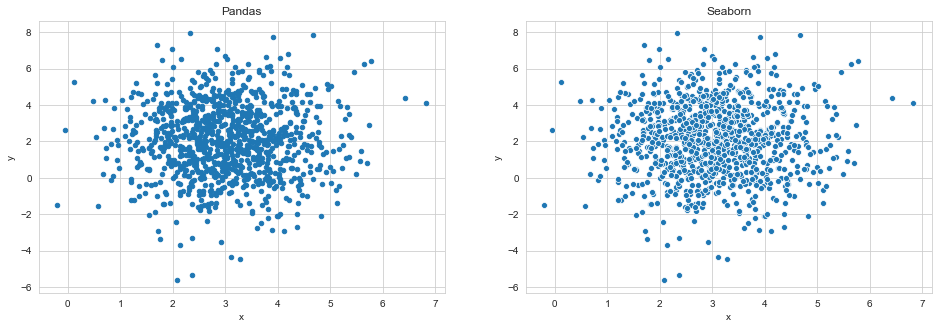

In [41]:
# Fill a data frame with two series sampled from different normal distributions
df = pd.DataFrame({'x': np.random.normal(3, 1, size=1000), 'y': np.random.normal(2, 2, size=1000)})
# Generate figure with two side-by-side plotting areas
fig, (ax1, ax2) = plt.subplots(figsize=(16,5), ncols=2)
# And plot with pandas and seaborn
df.plot.scatter(x='x', y='y', ax=ax1, title='Pandas')
sns.scatterplot(x='x', y='y', data=df, ax=ax2)
ax2.set_title('Seaborn');

#### Histogram

Next we will construct histograms from a single Series of values
randomly drawn from a Normal distribution. Again, the pandas-based
plot is on the left while the seaborn-based one is on the right.

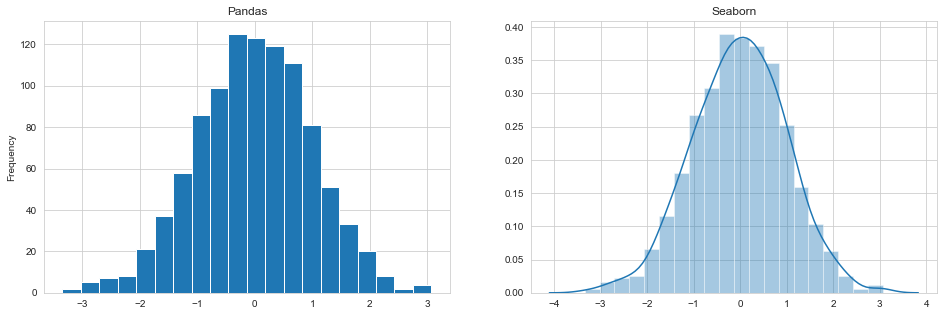

In [42]:
# Fill a series with IID normal values 
s = pd.Series(np.random.normal(size=(1000)))
# Generate figure with two side-by-side plotting areas
fig, (ax1, ax2) = plt.subplots(figsize=(16,5), ncols=2)
# And plot with pandas and seaborn
s.plot.hist(ax=ax1, bins=20, title='Pandas')
sns.distplot(s, ax=ax2, bins=20);
ax2.set_title('Seaborn');

#### Lineplot

Finally, we'll make a lineplot. To demonstrate this we generate
10 trajectories of brownian motion, drawing increments from
a standard normal distribution. The seaborn-based plot is 
also generated somewhat differently, Instead of plotting 
each path individually, we plot the average value across
all paths with the (sample) standard deviation visualized
with a shaded area. 

To use the seaborn lineplot, the data
frame needs to be in a slighly different format. Instead
of having N columns [var1, var2, ..., varN] and M rows, it 
requires 2 columns [index, value] and N*M rows. This is 
easily achieved with the [DataFrame.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) method. 
The melt method also generates a column storing the name
of the column each datapoint was sourced from (variable).
To make the seaborn-based plot equivalent to the one 
generated with pandas, we could have pased `hue='variable'`
to the plot function, which would have made it separate the
lines based on the elements in this column.

,index,variable,value
0,0,var_0,-0.277851
1,1,var_0,-1.308026
2,2,var_0,-1.134171


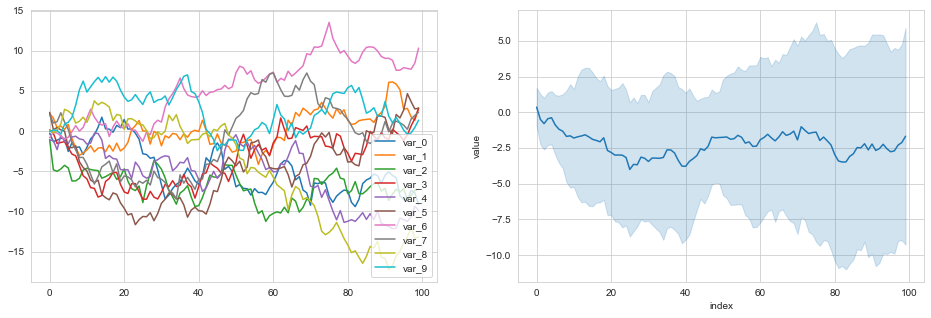

In [43]:
# Fill a dataframe with 10 brownian motion paths
df = pd.DataFrame()
for i in range(10):
    # var_i(t) = var_i(t-1) + e; var_i(0) = 0, e ~ N(0, 1) 
    df[f'var_{i}'] = np.random.normal(size=100).cumsum()
# Generate figure with two side-by-side plotting areas
fig, (ax1, ax2) = plt.subplots(figsize=(16,5), ncols=2)
# Plot each column with built-in plot function
df.plot(ax=ax1)
# Plot mean value with +/ stddev intervals
df_melted = df.reset_index().melt(id_vars='index')
sns.lineplot(x='index', y='value', ci='sd', data=df_melted);  # add hue='variable' to get same plot as with df.plot
# Grab the 3 first values in the melted data frame to show what it looks like
df_melted.head(3)

### Time Series

Before wrapping up the Pandas section we'll provide short
demonstration of how it can be helpful when working with
timeseries data. The DataFrame (or Series) index can take 
on datetime values, which allows for certain operations including:

- Selecting from or slicing the Series/DataFrame by date.
- Resampling the data to different convenient intervals.

The examples below illustrate how this can be done and 
visualize the results in different plots. Note also that
whenever the index is a datetime object, the built-in
Pandas lineplot will make sure that the dates are nicely
printed along the x-axis.

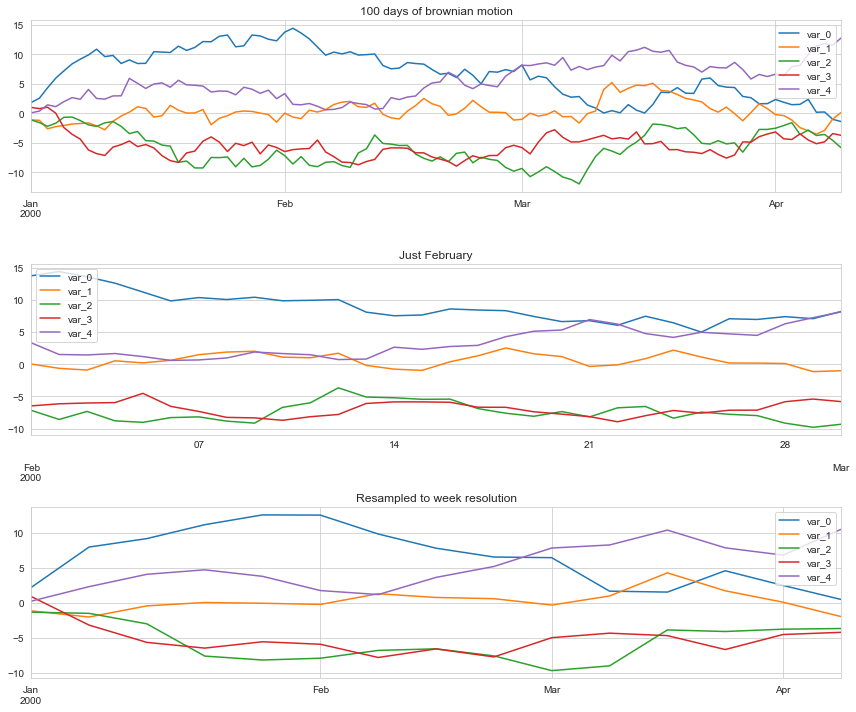

In [44]:
# Generate a datetime index 100 steps spaced 1 Day appart starting at year 2000
dt_index = pd.date_range(start='2000-01-01', freq='1D', periods=100)
# Initialize a dataframe using this index
df = pd.DataFrame(index=dt_index)
# Fill it with some brownian motion
for i in range(5):
    df[f'var_{i}'] = np.random.normal(size=len(df)).cumsum()
    
# Generate figure with three stacked plotting areas
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 10), nrows=3)
# Plot each column with built-in plot function
df.plot(ax=ax1, title='100 days of brownian motion')

# Slice out just the month of February 2000 and plot it
# Note: since we're using look, it will actually include March 1st
df_slc = df.loc['2000-02-01':'2000-03-01']
df_slc.plot(ax=ax2, title='Just February')

# Resample time series from day resolution to mean and take average value 
df_resamp = df.resample('1W').mean()
df_resamp.plot(ax=ax3, title='Resampled to week resolution')

# Automatically adjust plot to avoid overlapping elements
plt.tight_layout()

### Advanced DataFrame Manipulation

The preceding examples bare scratches the surface of what 
is possible to do with Pandas. In the remainder of this 
section, we will give examples of more advanced ways
the library can be used. To do this, the short, contrived
"datasets" used previously will no longer be sufficient.
Instead we will use a proper dataset, specifically NBA
game data from: https://github.com/fivethirtyeight/data/tree/master/nba-elo.

For our first trick, we will reveal that pandas can read files not only from your local filesystem, but also from a URL.

In [45]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
nba_dataset = pd.read_csv(url)

The `.head(n)` method returns the first `n` rows (same as `.iloc[:n]`)

In [46]:
nba_dataset.head(4)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN


And the `.info()` method returns metadata about the dataframe that might be useful for diagnostics.

In [47]:
nba_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

#### Datetime Parsing

As you can see, the "date_game" column is of the "object" data type.
Since it is suppose to represent a date, we would prefer if it had
a matching data type. There are two main ways to go about this.

 1. Provide a parser function when reading the dataset (sometimes, this can be inferred automatically by `read_csv`)
 1. Manually parse and convert it afterwards

In [48]:
# 1st way
# date_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
# nba_dataset = pd.read_csv(url, parse_dates=['date_game'], date_parser=date_parser)

# 2nd way (overwrite old date_game column with a parsed version)
nba_dataset['date_game'] = pd.to_datetime(nba_dataset['date_game'], dayfirst=False, yearfirst=False)

nba_dataset.info()  # Observe that "date_game" now is of type datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  elo_i          126314 non-null  float64       
 12  elo_n          126314 non-null  float64       
 13  win_equiv      126314 non-null  float64       
 14  opp_id         126314 non-null  object        
 15  

#### Unique Values

The `.nunique()` method returns the number of unique values in a
column (Series), the `.unique()` method returns the unique values,
and the `.value_counts()` method returns a Series with the count 
of every unique value.

In [49]:
# Let's calculate how many games are in the dataset 
print('Num games:', nba_dataset['game_id'].nunique())
# What leagues are presented in the dataset?
print('Leagues:', nba_dataset['lg_id'].unique())
# How many games performed in every league?
# Note: there are multiple entries for some games,
# so we filter the dataframe to only those rows 
# where '_iscopy' is False (zero)
print('Num games in each league:')
print(nba_dataset[nba_dataset['_iscopy'] == 0]['lg_id'].value_counts())

Num games: 63157
Leagues: ['NBA' 'ABA']
Num games in each league:
NBA    59008
ABA     4149
Name: lg_id, dtype: int64


#### Sorting

The `.sort_values(...)` method can be used to sort data by one or more columns.


In [50]:
# Data sorting
nba_dataset.sort_values('date_game', ascending=False)

# Sorting on several columns. Note that direction is specified for each column
nba_dataset.sort_values(['date_game', 'pts'], ascending=[False, True]).head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126312,63157,201506170CLE,NBA,0,2015,2015-06-16,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN
126313,63157,201506170CLE,NBA,1,2015,2015-06-16,103,1,GSW,Warriors,...,68.519516,CLE,Cavaliers,97,1700.7391,1692.0859,A,W,0.518550,NaN
126311,63156,201506140GSW,NBA,1,2015,2015-06-14,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN


#### Grouping

A common use case when analyzing data is to group it by
one or more variables and apply operations on each group
separately. A typical grouping operation looks like the 
following:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

- The groupby method creates a partitioning based on unique values in the grouping_columns
- We select the columns we need (columns_to_show).
- A function or multiple functions are applied to the resulting groups.

In the example below, the sum of points (pts) is calculated 
for each team (fran_id). Not that in the resulting DataFrame,
fran_id becomes the new index whereas pts becomes the only
column.

In [51]:
# First we create a "group_by" object around the team column (fran_id)
grouper = nba_dataset.groupby('fran_id')
# Then we extract the team and points columns
grouper = grouper[['fran_id', 'pts']]
# Then we apply the sum function 
group_sums = grouper.sum()
# And finally sort the rows by decreasing number of points
group_sums = group_sums.sort_values('pts', ascending=False)

# As shown above, this can be done in one line by chaining methods and accessors
group_sums = nba_dataset.groupby('fran_id')[['fran_id', 'pts']].sum().sort_values('pts', ascending=False)
group_sums.head(3)

,pts
fran_id,
Lakers,637444
Celtics,626484
Warriors,591224


#### Pivot Tables

Pivot tables are useful for breaking down and describing a 
variable with respect to many others. Those familiar with
spreadsheet programs might already be familiar with the concept.
Intuitively, it can be tought of as a groupby operation along 
both the row and column axis. Here we will examine matches 
between (two of) three teams and break down the average 
number of points earned with respect to team, game result, and 
the year the game was played.

In [52]:
# First we filter the data to only those games where
# the Lakers, Warriors, or Celtics were involved
teams = ['Lakers', 'Warriors', 'Celtics']
predicate = nba_dataset['fran_id'].isin(teams) & nba_dataset['opp_fran'].isin(teams)
small_df = nba_dataset[predicate]

# Then we extract columns for team, year, result and number of points
small_df = small_df[['fran_id', 'year_id', 'game_result', 'pts']]

# And construct a pivot table 
nba_pt = pd.pivot_table(
    small_df,
    # Break down by team and result along the row axis
    index=['fran_id', 'game_result'],
    # Break down by year along the column axis
    columns=['year_id'],
    # Average values in body of the table (points)
    aggfunc='mean'
)
nba_pt

pts                                                     \
year_id               1947   1948       1949       1950       1951       1952   
fran_id  game_result                                                            
Celtics  L            53.8  66.00  75.166667  76.875000  79.142857  87.000000   
         W            77.0  66.75  86.400000  86.500000  89.142857  88.888889   
Lakers   L             NaN    NaN  63.666667  73.000000  76.400000  81.714286   
         W             NaN    NaN  85.571429  88.000000  88.000000  99.800000   
Warriors L            65.0  60.50  79.428571  72.714286  77.000000  84.500000   
         W            66.0  76.75  87.500000  84.000000  84.500000  91.285714   

                                                                    ...  \
year_id                    1953       1954        1955        1956  ...   
fran_id  game_result                                                ...   
Celtics  L            88.166667  79.222222  101.363636  109.444444  ...   
         W            90.300000  97.666667  107.500000  112.333333  ...   
Lakers   L            85.000000  85.200000   96.166667   99.461538  ...   
         W            94.818182  91.181818  102.166667  105.400000  ...   
Warriors L            78.800000  84.333333   94.230769  102.875000  ...   
         W            92.000000  85.166667  106.000000  119.076923  ...   

                                                                             \
year_id                2006        2007        2008        2009        2010   
fran_id  game_result                                                          
Celtics  L            103.0   97.250000   98.666667   93.666667   84.500000   
         W            110.5         NaN  108.000000  119.000000   97.400000   
Lakers   L            111.0         NaN   96.875000         NaN   88.750000   
         W            107.6  111.333333  109.000000  114.833333  104.111111   
Warriors L            100.2   99.750000  104.666667  111.400000  105.000000   
         W            111.0  103.000000  114.000000   99.000000  103.000000   

                                                                             
year_id                     2011        2012   2013        2014        2015  
fran_id  game_result                                                         
Celtics  L             86.000000   90.500000   91.0   95.250000  107.666667  
         W            110.333333  105.000000  105.0         NaN  113.000000  
Lakers   L             91.500000         NaN   99.0   90.666667  105.000000  
         W            107.750000  100.833333  112.5  103.333333  116.500000  
Warriors L             95.600000   98.600000   98.5   95.000000  105.000000  
         W             95.000000         NaN  105.0  109.200000  118.200000  

[6 rows x 69 columns]

#### Stacking and Unstacking

Note that in the pivot table above, the index has become a 
hierarchical tuple (fran_id, game_result) and the columns 
a hierarchical tuple (pts, year_id). Under 
the hood, indexes and columns are the exact same data
structure, just used to describe the data along the 
first and second axis respectively. Consequently it is 
straightforward to swap values in the two data 
structures around. The `.stack(level)` method will reorganize
the dataframe so that the column(s) specified by `level` are
moved to the index.

**Note:** In the examples below, we always refers to column
or index "levels" by their string name. This is possible because
the `pivot_table` function generated indexes and columns with 
named levels. In DataFrames where this is not the case, you 
can still use the `stack` functions by referring to levels
with an integer (see the comments in the cells below).

In [53]:
df = nba_pt.stack('year_id')  # Alternatively nba_pt.stack(1)
df.head(3)

pts
fran_id game_result year_id           
Celtics L           1947     53.800000
                    1948     66.000000
                    1949     75.166667

By adding a call to the `.reset_index()` method, we can
convert the (fran_id, game_result, year_id) values of the
hierarcical index to normal columns, essentially reverting
to the "small_df" variable used to construct the pivot table
above.

In [54]:
df = nba_pt.stack('year_id').reset_index()  # Alternatively nba_pt.stack(1).reset_index()
df.head(3)

,fran_id,game_result,year_id,pts
0,Celtics,L,1947,53.800000
1,Celtics,L,1948,66.000000
2,Celtics,L,1949,75.166667


The `.unstack(indexes)` method works in the 
oposite way, and converts indexes to columns.
Here we will use it in conjuction with `stack`
to swap "year_id" (columns) with "game_result"
(second level of index).

In [55]:
df = nba_pt.stack('year_id').unstack('game_result')  # Alternatively: nba_pt.stack(1).unstack(1)
df.head(3)

pts       
game_result              L      W
fran_id year_id                  
Celtics 1947     53.800000  77.00
        1948     66.000000  66.75
        1949     75.166667  86.40

#### Concatenating

Another relatively common use case is to combine two or
more DataFrames or Series into a single one. The `concat`
function concatenates a list of DataFrames or Series 
toghether, either vertically (along the row (0) axis)
or horizontally (along the column (1) axis).

**Note:** We'll also take this opportunity to introduce 
the `query` method of DataFrames. This is just a more 
elegant way to filter the rows of a dataframe based on
the values in one or more columns. That is, `df.query('foo == x')`
is equivalent to `df[df.foo == x]`. Also, the method allows
the query string to reference variables from the current 
scope by prepending the variable name by `@`.


In [56]:
# Filter dataset by team=celtics and then team=lakers
team2 = 'Lakers'
df_1 = nba_dataset.query('fran_id == "Celtics"')[['fran_id', 'pts']]
df_2 = nba_dataset.query('fran_id == @team2')[['fran_id', 'pts']]
# Concatenate vertically (axis=1 would result in horizontal concatination)
df_both = pd.concat([df_1, df_2], axis=0)
df_both

,fran_id,pts
6,Celtics,53
14,Celtics,55
28,Celtics,46
40,Celtics,61
46,Celtics,62
...,...,...
126016,Lakers,101
126052,Lakers,106
126086,Lakers,106
126115,Lakers,92


#### Merging

Pandas has full-featured in-memory join operations, idiomatically very similar to SQL-based relational databases. Here, we'll demonstrate how a left join can be carried out with the `merge` function.

First, we grab the game_id, year, team, and points scored
for each datapoint in the dataset.

In [57]:
df_date_team = nba_dataset.query('_iscopy != 0')[['game_id', 'year_id', 'fran_id', 'pts']]
df_date_team.head(3)

,game_id,year_id,fran_id,pts
1,194611010TRH,1947,Knicks,68
3,194611020CHS,1947,Knicks,47
5,194611020DTF,1947,Capitols,50


Then we compute the yearly average number of points of each team.

In [58]:
df_avgp_per_year = (nba_dataset
    .query('_iscopy != 0')[['year_id', 'fran_id', 'pts']]
    .groupby(['year_id', 'fran_id']).mean()
    .reset_index()
)
df_avgp_per_year.head(3)

,year_id,fran_id,pts
0,1947,Bombers,67.937500
1,1947,Capitols,70.545455
2,1947,Celtics,58.866667


Finally, we merge the yearly averages back into the first
DataFrame. We use a left join, meaning that for 
each (year_id, fran_id) tuple in the first (left) data
frame, the function will look up the corresponding 
(year_id, fran_id) in the second (right) data frame and concatenate
the result horizontally.

In [59]:
merged = pd.merge(
    # Merge with the first dataframe on the left and 
    # the second (yearly averages) on the right
    left=df_date_team,
    right=df_avgp_per_year,
    # Look up values in the right based on values in the left 
    how='left',
    # Using the following keys (same names in both dataframes)
    left_on=['year_id', 'fran_id'], 
    right_on=['year_id', 'fran_id'],
    # Keep the columns in the left dataframe unchanged,
    # but add an '_avg' suffix to columns in the right
    suffixes=('', '_avg')
)
merged.head()

,game_id,year_id,fran_id,pts,pts_avg
0,194611010TRH,1947,Knicks,68,62.666667
1,194611020CHS,1947,Knicks,47,62.666667
2,194611020DTF,1947,Capitols,50,70.545455
3,194611020PRO,1947,Celtics,53,58.866667
4,194611020STB,1947,Ironmen,51,62.600000


Be careful when choosing the merging method. You may recieve different results based on the four types:

- left — Use keys from left frame only
- right — Use keys from right frame only
- outer — Use union of keys from both frames
- inner — Use intersection of keys from both frames

## Scikit Learn

<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg" alt="Drawing" style="width: 200px;"/>

[Scikit Learn](https://scikit-learn.org/stable/) is a python library
that provides stable implementations of a wide selection of 
machine learning algorithms. Additionally, it provides tools for 
preprocessing, analysis, and evaluation, as well
as a framework setting up machine learning workflows. Except for simple
architectures (e.g. [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)),
this library is not the best resource for neural networks and 
deep learning. For those interested in those topics, libraries such as
[PyTorch](https://pytorch.org) and [Tensorflow](https://www.tensorflow.org)
are likely to provide more utility. Nevertheless, many of the tools provided by Scikit
Learn can still be useful in a predominantly deep-learning-based setting,
and the classical machine learning algorithms provided
often serve well as baselines when justifying more complex approaches.

The rest of this tutorial will cover the following:

- The Estimator Class
- Metrics
- A practical classification task

In [60]:
import sklearn 

### The Estimator Class

Most components in the Scikit Learn package implements a 
common interface. For supervised predictive models, the
three most relevant methods are:

- **fit(X, y)**: which fits the model's parameters so that
    it approximates $f : X \rightarrow y$, where X is (usually) an 
    MxN-dimensional matrix and y is an M-dimensional vector.
    The exact datatype and expected values in X and y depends
    on the machine learning method used. Also note that for 
    unsupervised methods (e.g. KMeans), only the X matters,
    so the y is typically optional and will be ignored if passed.
    
- **predict(X)**: which makes a prediction with the model over 
    the MxN-dimensional input matrix (note that M doesn't have
    to be the same here as in fit). Naturally, this method should
    only be called after the .fit method has been called.
    
- **score(X, y, [sample_weight])**: which evaluates the model over
    a set of datapoints. The evaluation measure used 
    varies from model to model. For instance, most classifiers
    tend to use accuracy (see next section).
    
The set of *hyperparameters*, i.e. all model parameters that are 
not inferred from data in the .fit method, are passed as arguments
to the model's constructor function. Behind the scenes, the base
class used for all estimators (sklearn.base.BaseEstimator) also
implements the methods `.get_params()` and `.set_params(...)`.
The values returned by the former will be based on the arguments 
passed to the constructor and the latter allows these parameters
to be overridden on an already constructed model.

Other methods that you might encounter include:

- **predict_proba(X)**: which returns the associated probabilities/confidence 
    scores for each prediction. These are most commonly found in classifier
    models, in which case they will return either just a vector of probabilities
    $p; p_i \in [0, 1]$ for binary classification or a matrix of 
    probabilities $P$ where all the rows sum to one.
- **transform(X)**: which does not make a prediction, but instead transforms
    input X to an alternative representation. This method is commonly implemented
    in preprocessing models such as [scalers](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- **fit_transform(X, y)**: similar to transform, except that it first calls 
    fit and then transforms the input.
    
More advanced models include composit models that encapsulate other models.
A good example of this is the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html),
which permits chaining together different preprocessing models,
typically with a predictive model at the top. 

For simplicity, we'll focus on predictive models in this tutorial,
starting with a custom implementation of [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
The cell below implements the three basic methods mentioned above, which
provides the bare minimum for estimating, using, and evaluating
a machine learning model. In addition there is a constructor that 
accepts a single parameter `use_bias`, which flags whether an 
intercept will be fitted when estimating parameters.

In [61]:
import sklearn.base

class LinearRegressor(sklearn.base.BaseEstimator):
    """
    A simple, custom linear regression model that is highly similar
    to sklearn.linear_model.LinearRegression
    
    Args:
        use_bias: whether to also fit the intercept of the hyperplane
            when estimating coefficients.
    """
    
    # By convention, attributes that are generated when the model
    # is fitted to data are stored under properties called "<name>_"
    weights_ = None
    bias_ = None 
    residuals_ = None
    
    def __init__(self, use_bias=True):
        """
        Initializes the estimator.
        """
        self.use_bias = use_bias
        
    def fit(self, X, y):
        """
        Fits the estimator to the data.
        
        Args:
            X: an MxN-diensional matrix of real-valued features
            y: an M-dimensional vector of real-valued target outputs
            
        Returns:
            A reference to this estimator, but with fitted parameters.
        """
        # Make sure it is an array, in case we get a list or DataFrame
        X = np.asarray(X)
        # Augment matrix with a column of ones if bias 
        if self.use_bias:
            X = np.concatenate([X, np.ones((len(X), 1))], axis=1)
        # Estimate coefficients with least square 
        coef, res, *_ = np.linalg.lstsq(X, y, rcond=-1)
        if self.use_bias:
            weights, bias = coef[:-1], coef[-1]
        else:
            weights, bias = coef, 0 
        # Set state 
        self.weights_ = weights
        self.bias_ = bias 
        self.residuals_ = res 
        # And, by convention, return the train predictor (self in this case)
        return self 
    
    def predict(self, X):
        """
        Make a prediction with trained parameters
        
        Args:
            X: an MxN-dimensional matrix of real-valued features
            
        Returns:
            An N-dimensional vector of real-valued predictions
        """
        X = np.asarray(X)
        # Make sure that weights have been calculated with .fit()
        assert self.weights_ is not None
        # Make sure X has the right shape
        assert X.shape[1] == self.weights_.shape[0]
        # Return y_hat = Xw + b  ; where b might be zero if use_bias=False
        return X @ self.weights_ + self.bias_
    
    def score(self, X, y, sample_weight=None):
        """
        Scores the models over a set of datapoints using negative mean squared error
        
        Args:
            X: an MxN-dimensional matrix of real-valued features
            y: an M-dimensional vector of real-valued target outputs
            sample_weight: a string with the name of the scoring function to use
            
        Returns:
            A real-valued scalar equal to the negative mean squared error
        """
        y_hat = self.predict(X)
        squared_errors = (y_hat - y) ** 2
        # Compute weighted average of weights. Note that if 
        # sample_weight is None, this function will just 
        # compute a simple, unweighted average 
        # ALSO: note that we return the negative MSE! 
        # This is a convention in sklearn where all scoring
        # functions are defined so that HIGHER -> BETTER
        # All error-based scoring measures thus have to be negated
        return -np.average(squared_errors, weights=sample_weight)
        


In [62]:
def generate_data(n, true_weights, true_bias, error_variance):
    true_weights = np.array(true_weights)
    X = np.random.uniform(0, 10, size=(n, len(true_weights))) 
    e = np.random.normal(0, np.sqrt(error_variance), size=n)
    y = X @ true_weights + true_bias + e
    return X, y
    
    
X, y = generate_data(n=10000, true_weights=[-1.3, 0.1, 2.1], true_bias=3, error_variance=2)
reg = LinearRegressor(use_bias=True)
reg.fit(X, y)
print('Estimated weights=%s bias=%.3f' % (reg.weights_, reg.bias_))
print('In-sample score (negative MSE): %.3f' % reg.score(X, y))

Estimated weights=[-1.296  0.109  2.104] bias=2.907
In-sample score (negative MSE): -1.985


### Metrics

Next we'll look at different metrics used to evaluate
predictive performance. The word "metric" is used in the colloquial
sense here, i.e. "boiling the performance of the model down 
to a single number". For brevity, the examples here will
focus on metrics for supervised problems, but the sklearn
package also comes with a host of scoring functions for 
unsupervised settings (e.g. the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
for clustering evaluation).

In [63]:
import sklearn.metrics

#### Regression

Regression problems involve predicting one or
more real-valued target variables. Consequently,
the metrics used try to quantify the answer to
the question "how close was the model?". The 
notion of closeness depends on the problem and
how you believe the error residuals (difference between
prediction ($\hat{y}$) and ground truth ($y$)) values are distributed, but
the two most prolific ones are:

- **Mean Squared Error (MSE)** ($\frac{1}{N}\sum_i^N{|\hat{y}_i - y|^2}$) 
    which is equivalent to the sample variance of the error residuals.
    This metric was use as a scoring function in the example
    above.

- **Mean Absolute Error (MAE)** ($\frac{1}{N}\sum_i^N{|\hat{y}_i - y|}$)
    which can be thought of as a more robust version of MSE, as it is
    less sensitive to individual, extreme error residuals.

In [64]:
y_true = np.random.uniform(size=10000)
# Compute y_pred as y_true + e, where e are error
# residuals drawn from a centered normal distribution 
# with variance of 5
y_pred = y_true + np.random.normal(0, np.sqrt(5), size=len(y_true))
print('MSE: %.3f' % sklearn.metrics.mean_squared_error(y_true, y_pred))
print('MAE: %.3f' % sklearn.metrics.mean_absolute_error(y_true, y_pred))

MSE: 5.057
MAE: 1.787


#### Classification

In classification, we ask the model to predict
whether a given datapoint belongs to a certain
class or not. As opposed to regression problems,
classification problems typically entail a 
"hard decision", meaning that a single prediction
is either considered completely right or completely
wrong. There also exist metrics (e.g. [cross entropy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html) and [ROC AUC Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)) 
that account for  the degree of error, typically for classifiers that
produce probability-like predictions, but in the 
examples below we will focus on metrics for hard decisions.

**Accuracy** is perhaps the most straightforward
classification metric. It answers the question:
"out of all the samples I was supposed to make 
predictions for, what fraction did I get right?.
The example below uses sklearn's convenient 
`accuracy_score` function, but the behavior is 
equivalent to `np.mean(y_true == y_pred)` or 
$\frac{1}{N} \sum_i^N{\mathbb{1}({y_i = \hat{y}_i})}$,
where $\mathbb{1}(\cdot)$ is an indicator function that
is one if the predicate $\cdot$ is true and zero otherwise.

In [65]:
#                  v  x  x  v  v
y_true = np.array([0, 0, 0, 1, 1], dtype=np.float32)
y_pred = np.array([0, 1, 1, 1, 1], dtype=np.float32)
print('Accuracy: %.3f' % sklearn.metrics.accuracy_score(y_true, y_pred))

Accuracy: 0.600


**Precision** and **recall** answer two complementary questions:

- Precision: of all the times the model predicted a
    given class; what fraction of the times was it correct
- Recall: of all the times the model should have predicted
    a given class; what fraction of the times did it 
    
<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg" alt="Drawing" style="width: 400px;"/>
    
For the binary classification example below, the class in
question is the positive class (1). For multi-class prediction
tasks you have to compute precision and recall for each class
while considereing all classes not currently being evaluated
as being the negative class (one-vs-all).

In [66]:
y_true = np.array([0, 0, 0, 1, 1], dtype=np.float32)
y_pred = np.array([0, 1, 1, 1, 1], dtype=np.float32)
print('Precision: %.3f' % sklearn.metrics.precision_score(y_true, y_pred))
print('Recall: %.3f' % sklearn.metrics.recall_score(y_true, y_pred))

Precision: 0.500
Recall: 1.000


The **F1 Score** combines precision and recall into a 
single number. Mathematically, it can be formulated 
as $2 \frac{precision * recall}{precision + recall}$.
More intuitively, it can be thought of as how well the
model balances precision and recall, proxied by a 
number proportional to the ratio between the area 
and boundary of a rectangle spanned by the two 
quantities. As with precision and recall, it can still 
only be calculated in a binary setting, meaning that a 
one-vs-all approach is needed when evaluating over 
multi-class prediction tasks.

In [67]:
y_true = np.array([0, 0, 0, 1, 1], dtype=np.float32)
y_pred = np.array([0, 1, 1, 1, 1], dtype=np.float32)
print('F1 score: %.3f' % sklearn.metrics.recall_score(y_true, y_pred))

F1 score: 1.000


### Example

In [68]:
import sklearn.ensemble

#### Downloading Data

We begin by downloading the Yeast Dataset from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/Yeast) 
of open datasets. This is a categorical (as opposed to binary) classification
task where the goal is to assign proteins into one out of 10 classes.
From the dataset metadata, we have the following description of each attribute.

 - Sequence Name: Accession number for the SWISS-PROT database 
 - mcg: McGeoch's method for signal sequence recognition. 
 - gvh: von Heijne's method for signal sequence recognition. 
 - alm: Score of the ALOM membrane spanning region prediction program.  
 - mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins. 
 - erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute. 
 - pox: Peroxisomal targeting signal in the C-terminus. 
 - vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins. 
 - nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.
 
This is a tabular dataset that comes as a text document where rows are separated by the 
standard newline `\n` character and columns are separated by spaces.
The Pandas csv parser can handle this format, but we need to specify the value separation
pattern by using the regex `'\s+'` (one or more spaces) as opposed to the default `','`.
In addition, since the dataset comes without headers, we have to specify the column names
manually as a list of strings.

**Note**: Since we use a url to download the dataset straight into a DataFrame, this 
cell will not work in an off-line setting. It is done this way to keep this notebook
portable, but a valid alternative would be to first download and save the dataset 
file to `/some/path` and then read it with `pd.read_csv('/some/path', ...)`.

Finally we use the `.info()` method of the DataFrame to get a high-level summary
of its content. The `Sequence Name` column and the `target` column take on string values,
but the rest of the features are all numeric. Fortunately, none of the 1484 datapoints
contain any missing/null values. If this was the case, we might have wanted to look
into [imputation techniques](https://scikit-learn.org/stable/modules/impute.html) to
fill in the blanks.

In [69]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data'
columns = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'target']
dataset = pd.read_csv(url, names=columns, sep='\s+')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence Name  1484 non-null   object 
 1   mcg            1484 non-null   float64
 2   gvh            1484 non-null   float64
 3   alm            1484 non-null   float64
 4   mit            1484 non-null   float64
 5   erl            1484 non-null   float64
 6   pox            1484 non-null   float64
 7   vac            1484 non-null   float64
 8   nuc            1484 non-null   float64
 9   target         1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


#### Target Distribution

Next we'll have a look at the distribution of classes. The `value_counts()`
method is used on the `target` column of the DataFrame to get a series containing
the number of occurrences of each class. The series is the divided by the total
size of the dataset to get the fractional representation of each class. The 
seaborn package is then used to generate a pretty barchart of the distribution,
using the distribution index (values being counted) along the x-axis and 
the distribution values (relative frequencies) along the y-axis.

The dataset is highly imbalanced. The `CYT` and `NUC` classes constitute around 
30% each, the `MIT` class around 15%, and the `ME3` class around 10%. The remaining 
~15% is distributed among the remaining 6 classes, with `ERL` being the least 
represented class (only 5 samples).

Imbalanced target distributions pose a challenge for classification tasks.
Many machine learning models, either implicitly or explicitly, assume 
a uniform/balanced target distribution, which can lead to poor performance
when this is not the case, particularly when doing inference for samples of the 
underrepresented classes. Additionally, imbalanced class distributions 
can often lead to deceiving results when using certain metrics for 
evaluating predictive performance. For instance, consider the binary classification
problem of $x \rightarrow y$, $y \in \{0, 1\}$. If $p(Y=1) = 0.99$, i.e. 99% of 
samples of $y$ take on the value of 1, then a classifier that deterministically
maps all $x \rightarrow 1$ will obtain an accuracy of 99%, which at a glance might
look really impressive despite the fact that it doesn't use any of the information
in $x$ to improve its posterior estimate over $y$.

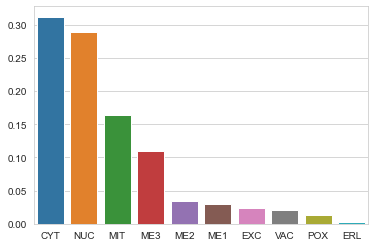

In [70]:
target_dist = dataset.target.value_counts() / len(dataset)
sns.barplot(x=target_dist.index, y=target_dist.values);

#### Scatterplots with 2-and-2 features

It is important to properly explore the data in order to
make informed decisions around the choice of model and 
hyperparameters to use. Additionally, the dataset might have
features that either contain little information and should
be dropped or that could be transformed into a representation
that is easier to work with for the model.
For more inspiration and guidance on how this can be done,
check out [this kaggle notebook](https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization).

Here, we'll stick with a simple, yet fairly informative 
grid of plots generated by the `pairplot` function from seaborn. 
It generates scatter plots for each pair of features in 
the dataset, and a histogram for each variable along the 
diagonal. In addition, the data are color coded based on
the target variable becuase we set the optional `hue`
keyword argument. A few observations about the data include:

- Except maybe for (gvh, mcg), there is relatively little 
  correlation between the features. If there is a lot of 
  correlation between variables, the dataset can often 
  be simplified with e.g. [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- There appears to be a finite number of values for 
    erl (2) and pox(3). These variables could be encoded
    as categorical variables without loosing any information
    (except their relative order). However, the distribution
    between the different categories appear to be highly
    inbalanced, so simply dropping the featues might 
    also be an option.
- The alm feature appears to do a good job at separating 
    the CYT (green) and ME3 (pink) classes. It could 
    potentially work well with simple models such as 
    logistic regression or linear SVM for this (isolated)
    binary classification problem.

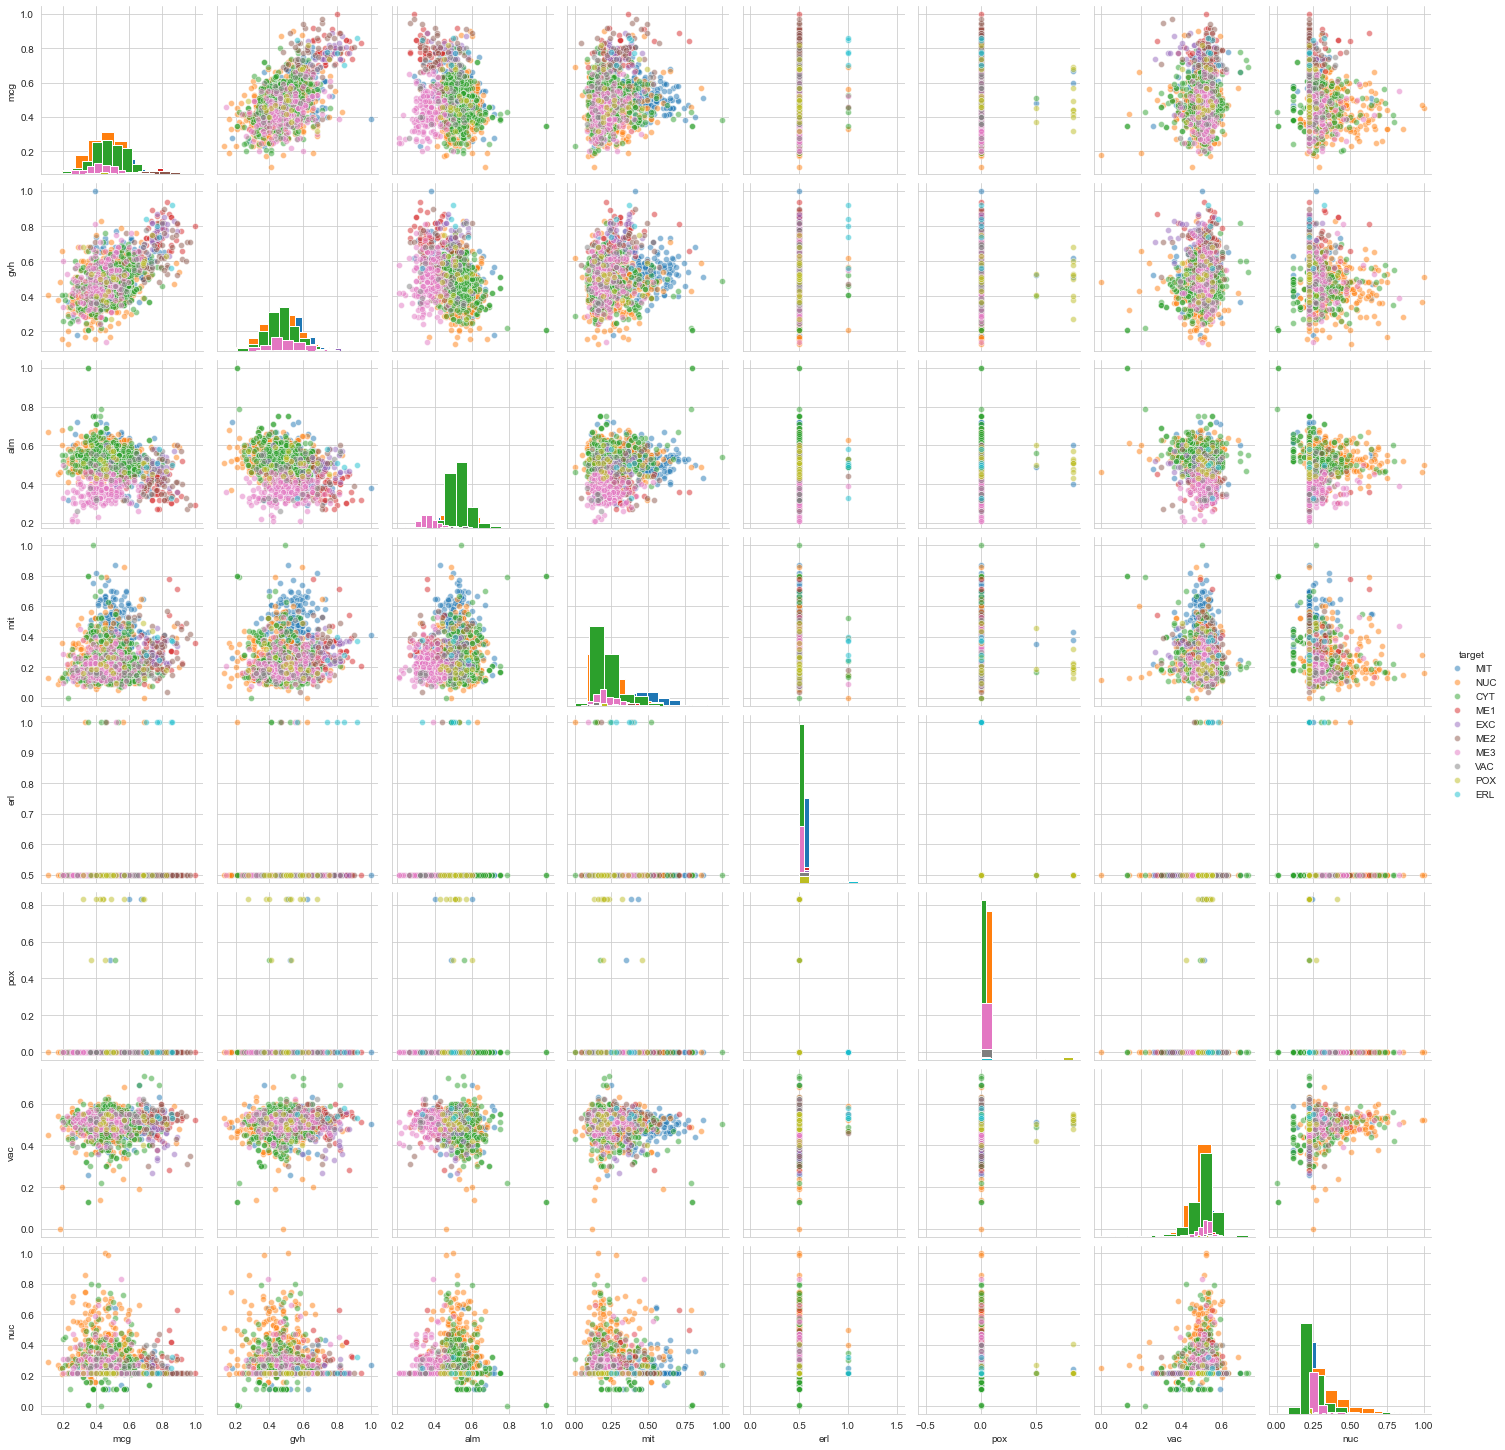

In [71]:
sns.pairplot(dataset, hue='target', diag_kind='hist', plot_kws={'alpha': 0.5})

#### Train-Test Split

In machine learning, we primarily care about out-of-sample performance, 
i.e., how well does the model generalize when applied to novel datapoints.
It is, therefore, very common to split the dataset into (at least)
two parts:

- A training set to fit model and parameters
- A testing set to estimate out-of-sample performance

We start by separating the features from the categorical targets.
The column called "Sequence Name" is also dropped, as it is just a unique
identifier for each datapoint (could have been used as an index).
The `train_test_split` function from the `model_selection`
sub-package of sklearn is then used to partition the data 
into two disjoint sets. The sets are sampled randomly, but 
constrained by the `stratify` argument to ensure proportional
representation of all classes across the split.

In [72]:
# Separate features from targets 
X = dataset.drop(columns=['target', 'Sequence Name'])
y = dataset.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    # Data to split up
    X, y,
    # Fraction of samples in the train set (60%)
    train_size=0.6, 
    # Shuffle before splitting, so that the sets are sampled randomly
    shuffle=True,
    # Random seed, for reproducibility 
    random_state=123,
    # Stratify splits so that class distribution is preserved  
    stratify=y
)
print('Training on %s samples' % len(X_train))
print('Testing on %s samples' % len(X_test))

Training on 890 samples
Testing on 594 samples


#### Initial Classification with Random Forest

Without more deliberation, we'll try to train a classifier
and see what happens. We will use a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html),
which is an ensemble model based on decision trees.
It's key distinguishing property, compared to single-tree 
algorithms, is that it constructs an ensemble
of trees based on different subsamples of both features
and datapoints. During inference, the predictions from all
the individual trees in the forest are aggregated into
a single prediction which (assuming that the trees are
reasonably uncorrelated) is expected to have a lower
error than any of the individual trees.

After constructing the classifier with default parameters (except for seed)
and fitting it to the training data, a prediction is made across
both the test set and the training set.
The [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
function is then used to compute precision, recall, and f1-score 
for each class, as well as aggregates and accuracy across all the data.
We also generate *confusion matrices* for both sets of predictions to 
get a better overview of which classes the model is more likely to conflate. 

It can be observed that the default RF classifiers manages
to fit the training data quite well. In fact, it gets every
single training sample right. The test set tells a different story.
Only 61% of the predictions are correct, which is certainly 
better than random guessing, but not amazing. Additionally, performance
across samples of the most underrepresented classes are abyssmal. 
The discrepency between the training set and the testing set
could be an indication of a concept known as [overfitting](https://en.wikipedia.org/wiki/Overfitting),
which is when increased in-sample performance comes at the cost
of worse out-of-sample performance. 

-----------------------------------------------------
                         Train                      
-----------------------------------------------------
              precision    recall  f1-score   support

         CYT       1.00      1.00      1.00       278
         ERL       1.00      1.00      1.00         3
         EXC       1.00      1.00      1.00        21
         ME1       1.00      1.00      1.00        26
         ME2       1.00      1.00      1.00        31
         ME3       1.00      1.00      1.00        98
         MIT       1.00      1.00      1.00       146
         NUC       1.00      1.00      1.00       257
         POX       1.00      1.00      1.00        12
         VAC       1.00      1.00      1.00        18

    accuracy                           1.00       890
   macro avg       1.00      1.00      1.00       890
weighted avg       1.00      1.00      1.00       890

-----------------------------------------------------
                         T

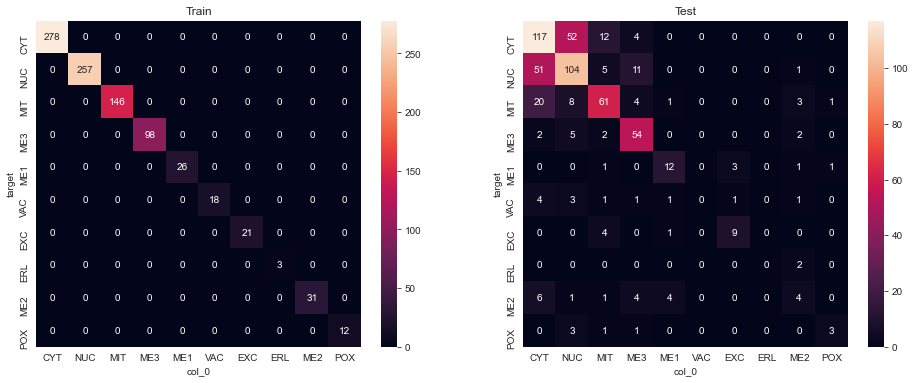

In [73]:
# Create a random forest classifier with default parameters
model = sklearn.ensemble.RandomForestClassifier(random_state=123) 
# Fit it to the training data 
model.fit(X_train, y_train)
# Make in- and out-of-sample predictions
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
# Print out classification results and plot confusion matrices 
r_train = sklearn.metrics.classification_report(y_train, y_train_hat, zero_division=0)
print('{0:->53}\n{0:>25}Train{0:<22}\n{0:->53}'.format("")); print(r_train)
r_test = sklearn.metrics.classification_report(y_test, y_test_hat, zero_division=0)
print('{0:->53}\n{0:>25}Test {0:<22}\n{0:->53}'.format("")); print(r_test)
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), ncols=2)
cl = y_train.unique()
cm = lambda y, y_hat: pd.crosstab(y, y_hat).T.reindex(cl).T.reindex(cl).fillna(0).astype(int)
ax1.set_title('Train')
sns.heatmap(cm(y_train, y_train_hat), annot=True, fmt='d', ax=ax1)
ax2.set_title('Test')
sns.heatmap(cm(y_test, y_test_hat), annot=True, fmt='d', ax=ax2);

#### Hyperparameter Optimization with Optuna

The out-of-sample performance of the approach above leaves
some to be desired. One possible improvement could be to have another
look at the data and e.g. try to [reduce the number of features](https://scikit-learn.org/stable/modules/feature_selection.html),
which, assuming that some of the features contain more noise than signal,
should have a regularizing effect on the classifier and thus
reduce the gap between train and test set error. Alternatively, a 
different choice of model family could be explored, such as 
[softmax regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
or [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
For brevity, we'll stick to the Random Forest Classifier here, but 
try changing its behavior by tuning hyperparameters. 

The Random Forest Classifier has several hyperparameters that affects
how it is trained. Most of them place constraints on how the decision
trees are built and limits the expressiveness of the model, which in 
turn contributes to inductive bias. Other hyperparameters control how
data for each tree are sampled, which in turn affects how similar each
tree is likely to be, and thus, how unorrelated we can expect the errors
to be. The full set of hyperparameters for the sklearn implementation 
used here can be found in [its documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html),
but the example here will focus on the following three:

- **n_estimators** - the number of decision trees used in the forest. The expressiveness/capacity of the model increases with this value.
- **max_depth** - the maximum depth of each tree. The expressiveness/capacity of the model also increases with this parameter.
- **class_weight** - class-based weighting of samples when forming tree nodes. This parameter can take 4 different values:
    - None (default) - in which case the algorithm will treat all samples the same
    - balanced - in which case samples will be weighted inversly proportionally to their representation in the dataset
    - balanced_subsample - in which case samples will be weighted inversly proportionally to their representation in the bootstrap samples used to form a single tree
    - dict/list - in which case custom weights given by the input will be used (we will ignore this option)

The hyperparameters will be optimized by a package called [Optuna](https://optuna.readthedocs.io/en/stable/),
which permits optimization of arbitrary stochastic, black-box functions.
In this case, the black-box function is the mapping from hyperparameters
to average K-fold cross-validation score, which is implemented in 
the `objective` function below.
To do this, optuna runs multiple experiments with different choices of 
hyperparameters while maintaining an estimate of how choices affect
the resulting performance, and suggesting new values that are expected
to maximize score based on this belief. 
The example below uses the (default) TPE algorithm to control this process,
which the interested reader can find more information about in section 4
of [this paper](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf).
Analogous libraries to optuna include [hyperopt](http://hyperopt.github.io/hyperopt/) 
and [nevergrad](https://facebookresearch.github.io/nevergrad/), and
more brute-force alternatives include [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
and (of course) manual trial and error by the researcher.

**Side Note:** the following cell is quite long. In a structured project,
it might be prudent to move longer snippets of code into separate python
files and import them into the notebook as that will; (A) make it easier
to version control with git, (B) permit it to be shared between notebooks,
and (C) make the notebook tidier. We'll take this opportunity to demonstrate
how this can be further streamlined with the *autoreload* functionality
in the cells bellow.

In [74]:
%%writefile optimize.py 
# ^ IPython magic for saving content of current cell to file 
# Have a look in the folder this notebook is running from

import sklearn.ensemble 
import sklearn.model_selection
import numpy as np
import optuna 

def hyperopt_random_forest(X, y, scoring, n_trials=100, n_splits=3, verbose=True, seed=None):
    """
    Optimizes hyperparameters for a Random Forest Classifier.
    
    
    Args:
        X: an MxN-dimensional design matrix with features
        y: an M-dimensional vector of categorical targets
        scoring: a string with the name of which scoring function to use. 
            See https://scikit-learn.org/stable/modules/model_evaluation.html
        n_trials: how many trials to run the optimizer for 
        n_splits: K in K-Fold cross validation
        verbose: whether to enable Optuna logging 
        seed: random seed (int or None) to use
        
    Returns:
        An optuna study object with information about the optimization process
    """
    
    # Create random state for reproducibility
    random = np.random.RandomState(seed)
    
    # Objective function that will be called each optimization iteration 
    def objective(trial):
        # Setup model, allowing the optimization "trial" object
        # to select hyperparameters from predefined ranges
        model = sklearn.ensemble.RandomForestClassifier(
            # Sample how many trees to use between 1 and 100
            n_estimators=trial.suggest_int('n_estimators', 1, 100),
            # Sample maximum depth of each tree between 1 and 20
            max_depth=trial.suggest_int('max_depth', 1, 20),
            # Sample class weighting strategy among the 3 options
            class_weight=trial.suggest_categorical('class_weight', [None, 'balanced', 'balanced_subsample']),
            # Pass on seeded random state for reproducibility 
            random_state=random
        )
        
        # Setup cross validation scheme, use StratifiedKFold
        # to ensure proportional class balance in train and test set
        cv = sklearn.model_selection.StratifiedKFold(
            # Do an n_split
            n_splits=n_splits, 
            # Pass on seeded random state for reproducibility
            random_state=random,
            # Sample randomly 
            shuffle=True,
        )
        
        # Compute cross-validation score for the model using the given performance measure
        return sklearn.model_selection.cross_val_score(model, X, y, scoring=scoring, cv=cv).mean()
    
    # Set verbosity level for optuna 
    if verbose:
        optuna.logging.set_verbosity(20)
    else:
        optuna.logging.set_verbosity(0)
    
    # Create optuna study and optimize `objective` function for 
    # the given number of iterations 
    study = optuna.create_study(
        sampler=optuna.samplers.TPESampler(seed=seed),
        direction='maximize',
    )
    # Run optimizer. This will call the `objective` function `n_trials`.
    study.optimize(objective, n_trials=n_trials)
    return study 
        
        

Overwriting optimize.py


#### External Code Reloading

Even though the function defined in the cell above can be used as it, we 
will load it from a file instead to show how the autoreload module can be used.
By default, code imported from external python modules will only be loaded
once, meaning any changes done to it afterwards will not be reflected in
the python process it was imported into. This is particularly annoying when
working with jupyter notebooks, were it is common to let the process keep
running for long periods of time.

This problem can be fixed manually by using the [reload function](https://www.geeksforgeeks.org/reloading-modules-python/),
but in IPython (which is what is running behind the scenes in jupyter), things 
can be made even easier with the [autoreload extension](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html).
The autoreload extension allows imported modules to be automatically reloaded 
and is enabled by running the following IPython "[magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html)" 
command (typically at the top of the notebook).

In [75]:
%load_ext autoreload

#### Hyperparameter Optimizer Execution

Once the autoreload extension is loaded, we can activate it with the `%autoreload` 
magic keyword. This will ensure that whenever this cell is run, all the imported
modules will be reloaded. Here we will import the `optimize.py` module that was
generated by the `%writefile` keyword two cells above. Since autoreloading is 
enabled, any changes to that file will automatically applied whenever running
this cell. Note: we could also have used the `%autoreload 2` keyword, in which
case the module would be reloaded every single time any code was run anywhere 
in this notebook.

With autoreloading out of the way, lets get back to the main problem at hand;
optimizing the hyperparameters of the Random Forest classifier. We will run 
the optimizer for a total of 50 iterations and use `f1_macro` (unweighted 
average of f1-scores across all classes) as the optimization target. Only 
the training data will be passed to the optimization function. This entails
that the cross-validation procedure used will further partition the training
set K times, but never interact with the test set. This is important to prevent
risking accidentally overfitting the hyperparameters to the test set

In [76]:
%autoreload
# Import the python module. The %autoreload cell magic will
# make sure that the imported module is up-to date every time 
# this cell is run 
import optimize
study = optimize.hyperopt_random_forest(X_train, y_train, 'f1_macro', n_trials=50, seed=123)

[I 2020-10-05 09:38:59,158] A new study created in memory with name: no-name-ec5aac4c-e836-4698-933a-2a9d26f798ba
[I 2020-10-05 09:38:59,511] Trial 0 finished with value: 0.5475974104865967 and parameters: {'n_estimators': 67, 'max_depth': 3, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.5475974104865967.
[I 2020-10-05 09:38:59,670] Trial 1 finished with value: 0.5063801001938492 and parameters: {'n_estimators': 18, 'max_depth': 20, 'class_weight': 'balanced_subsample'}. Best is trial 0 with value: 0.5475974104865967.
[I 2020-10-05 09:38:59,952] Trial 2 finished with value: 0.31121565601288353 and parameters: {'n_estimators': 58, 'max_depth': 2, 'class_weight': None}. Best is trial 0 with value: 0.5475974104865967.
[I 2020-10-05 09:39:00,231] Trial 3 finished with value: 0.4732411086927982 and parameters: {'n_estimators': 48, 'max_depth': 10, 'class_weight': None}. Best is trial 0 with value: 0.5475974104865967.
[I 2020-10-05 09:39:00,449] Trial 4 finished with v

#### Results from the Hyperparameter Optimizer

Having run the hyperparameter optimizer, we will now have a look at the results.
The `study` object used in the optimizer contains all the information about 
the search, including the history of suggested parameters and the resulting score 
that can be accessed as a DataFrame by using the `trials_dataframe()` method.
The parameters and resulting score of the most successful trial are also
respectively available under the attributes `best_value` and `best_params`.

We then generate plots to visualize the impact of the parameters. Since the 
search included three distinct parameters, it would be natural to create three plots,
but since the `class_weight` parameter only have three distinct values it has 
been color coded instead. It can be seen that the most impactful hyperparameters
is the balancing strategy; no balancing is consistently bad, and general balancing
appears to be slighly better than balanced subsampling. The max depth and number 
of estimators have a smaller impact on performance, but there appear to be slight
peaks around the parameters of the most successful trial.


Best Score: 0.596
Best Params: {'n_estimators': 33, 'max_depth': 12, 'class_weight': 'balanced_subsample'}


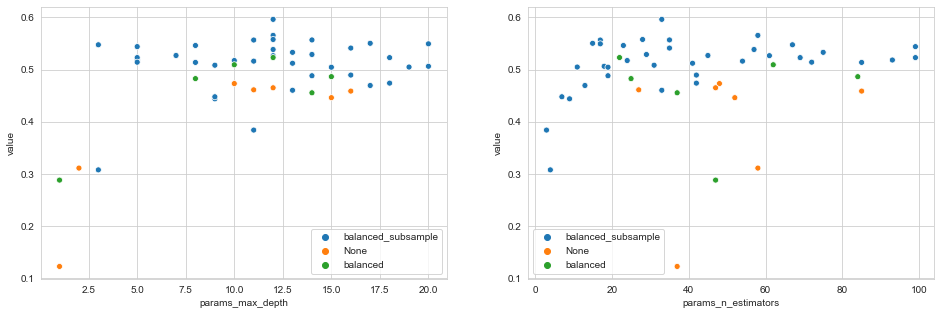

In [77]:
import matplotlib.pyplot as plt
df = study.trials_dataframe()
fig, (ax1, ax2) = plt.subplots(figsize=(16,5), ncols=2)
sns.scatterplot(x=df.params_max_depth, y=df.value, hue=df.params_class_weight.replace({None:'None'}).to_list(), ax=ax1)
sns.scatterplot(x=df.params_n_estimators, y=df.value, hue=df.params_class_weight.replace({None:'None'}).to_list(), ax=ax2)
print(f'Best Score: {study.best_value :.3f}')
print(f'Best Params: {study.best_params}')

#### Classification with Optimized Random Forest

Armed with a new, slighly better set of parameters that were optimized for 
macro f1-score, we rerun the classifier over the entire training set and 
evaluate it on the test set. Starting with the macro statistics, it can
be seen that precision, recall, and f1-score have been drastically improved
without taking a hit to the overal accuraccy. Performance on the least 
represented class, `ERL`, has been drastically improved from zero precision 
and recall to 100%. However, it is important to keep in mind that this class 
only have a support of 2 in the test set, so although it is nice to see it 
being addressed, it is difficult to confidently say anything about whether 
this classifier is well suited for identifying future instances of it.
Additionally, since the `ERL` class constitutes 1/10th of all the classes,
just getting these two predictions right is actually enough to raise the 
unweighted macro precision by 0.1, which alone can explain the full hike in
precision from 0.48 to 0.58.

-----------------------------------------------------
                         Train                      
-----------------------------------------------------
              precision    recall  f1-score   support

         CYT       0.90      0.95      0.93       278
         ERL       1.00      1.00      1.00         3
         EXC       1.00      1.00      1.00        21
         ME1       1.00      1.00      1.00        26
         ME2       1.00      1.00      1.00        31
         ME3       0.97      0.98      0.97        98
         MIT       0.94      0.90      0.92       146
         NUC       0.96      0.91      0.93       257
         POX       1.00      1.00      1.00        12
         VAC       1.00      1.00      1.00        18

    accuracy                           0.94       890
   macro avg       0.98      0.97      0.98       890
weighted avg       0.94      0.94      0.94       890

-----------------------------------------------------
                         T

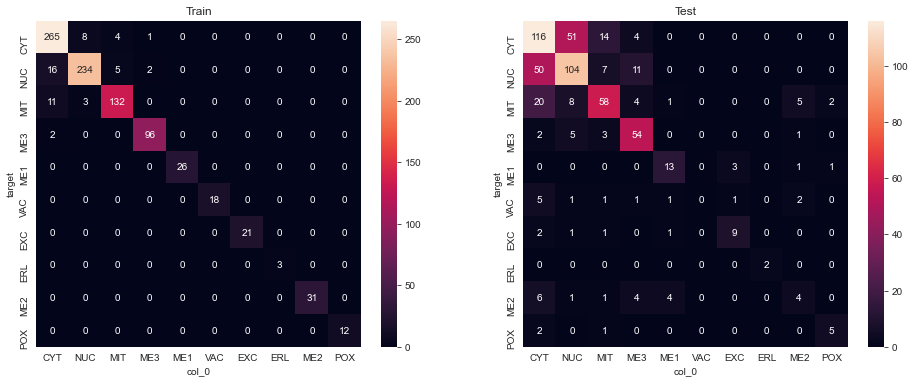

In [78]:
# Create a random forest classifier with default parameters
model = sklearn.ensemble.RandomForestClassifier(random_state=124, **study.best_params) 
# Fit it to the training data 
model.fit(X_train, y_train)
# Make in- and out-of-sample predictions
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)
# Print out classification results and plot confusion matrices 
r_train = sklearn.metrics.classification_report(y_train, y_train_hat, zero_division=0)
print('{0:->53}\n{0:>25}Train{0:<22}\n{0:->53}'.format("")); print(r_train)
r_test = sklearn.metrics.classification_report(y_test, y_test_hat, zero_division=0)
print('{0:->53}\n{0:>25}Test {0:<22}\n{0:->53}'.format("")); print(r_test)
fig, (ax1, ax2) = plt.subplots(figsize=(16,6), ncols=2)
cl = y_train.unique()
cm = lambda y, y_hat: pd.crosstab(y, y_hat).T.reindex(cl).T.reindex(cl).fillna(0).astype(int)
ax1.set_title('Train')
sns.heatmap(cm(y_train, y_train_hat), annot=True, fmt='d', ax=ax1)
ax2.set_title('Test')
sns.heatmap(cm(y_test, y_test_hat), annot=True, fmt='d', ax=ax2);